# Goal

Perform funnel analysis for a e-commerce website.

### *About funnel analysis

Typically, websites have a clear path to conversion: for instance, you land on the home page, then you search, select a product and buy it. At each of these steps, some users will drop off and leave the site. The sequence of pages that leads to conversion is called ‘funnel’ .

Funnel analysis allows to understand where/when our users abandon the website. It gives crucial insights on user behavior and on ways to improve the user experience as well as it often allows to discover bugs.

### *Tasks

1. A full picture of funnel conversion rate for both desktop and mobile


2. Some insights on what the product team should focus on in order to improve conversion rate as well as anything you might discover that could help improve conversion rate.

# Solution

## Question 1

### Load data

In [104]:
import pandas as pd
import numpy as np
from datetime import datetime

In [105]:
#read data
user = pd.read_csv("./Funnel_Analysis/user_table.csv")
home_page = pd.read_csv("./Funnel_Analysis/home_page_table.csv")
search_page = pd.read_csv("./Funnel_Analysis/search_page_table.csv")
payment_page = pd.read_csv("./Funnel_Analysis/payment_page_table.csv")
payment_confirmation = pd.read_csv("./Funnel_Analysis/payment_confirmation_table.csv")

In [106]:
#convert str to timestamp type
user['date'] = pd.to_datetime(user['date'])
print(user.head())

   user_id       date   device     sex
0   450007 2015-02-28  Desktop  Female
1   756838 2015-01-13  Desktop    Male
2   568983 2015-04-09  Desktop    Male
3   190794 2015-02-18  Desktop  Female
4   537909 2015-01-15  Desktop    Male


In [107]:
print(home_page.head())

   user_id       page
0   313593  home_page
1   468315  home_page
2   264005  home_page
3   290784  home_page
4   639104  home_page


In [108]:
print(search_page.head())

   user_id         page
0    15866  search_page
1   347058  search_page
2   577020  search_page
3   780347  search_page
4   383739  search_page


In [109]:
print(payment_page.head())

   user_id          page
0   253019  payment_page
1   310478  payment_page
2   304081  payment_page
3   901286  payment_page
4   195052  payment_page


In [110]:
print(payment_confirmation.head())

   user_id                       page
0   123100  payment_confirmation_page
1   704999  payment_confirmation_page
2   407188  payment_confirmation_page
3   538348  payment_confirmation_page
4   841681  payment_confirmation_page


### Data processing

In [111]:
#Join all tables together base on user_id
data = pd.merge(left = user, right = home_page, how = 'left', on = 'user_id')
data = pd.merge(left = data, right = search_page, how = 'left', on ='user_id', suffixes = ('_home', '_search'))
data = pd.merge(left = data, right = payment_page, how = 'left', on ='user_id')
data = pd.merge(left = data, right = payment_confirmation, how = 'left', on ='user_id', suffixes = ('_payment', '_confirmation'))
print(data.head())

   user_id       date   device     sex  page_home  page_search page_payment  \
0   450007 2015-02-28  Desktop  Female  home_page          NaN          NaN   
1   756838 2015-01-13  Desktop    Male  home_page          NaN          NaN   
2   568983 2015-04-09  Desktop    Male  home_page  search_page          NaN   
3   190794 2015-02-18  Desktop  Female  home_page  search_page          NaN   
4   537909 2015-01-15  Desktop    Male  home_page          NaN          NaN   

  page_confirmation  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  


In [112]:
#Convert null page type value into 0 and non-null page type into 1
data['page_home'] = data['page_home'].replace({np.nan:0,'home_page':1})
data['page_search'] = data['page_search'].replace({np.nan:0,'search_page':1})
data['page_payment'] = data['page_payment'].replace({np.nan:0,'payment_page':1})
data['page_confirmation'] = data['page_confirmation'].replace({np.nan:0,'payment_confirmation_page':1})
print(data.head())

   user_id       date   device     sex  page_home  page_search  page_payment  \
0   450007 2015-02-28  Desktop  Female          1            0             0   
1   756838 2015-01-13  Desktop    Male          1            0             0   
2   568983 2015-04-09  Desktop    Male          1            1             0   
3   190794 2015-02-18  Desktop  Female          1            1             0   
4   537909 2015-01-15  Desktop    Male          1            0             0   

   page_confirmation  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  


### Analysis

1) Calculate the ratio of visitor for each page type

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
#ratio of visitor = number of users land on this type of page / total number of users visit the website
ratio_of_visitor = pd.DataFrame({'page':['home','search','payment','confirmation'],'ratio of visitor':[data['page_home'].mean(),data['page_search'].mean(),data['page_payment'].mean(),data['page_confirmation'].mean()]})
print(ratio_of_visitor)

           page  ratio of visitor
0          home          1.000000
1        search          0.500000
2       payment          0.066704
3  confirmation          0.005000


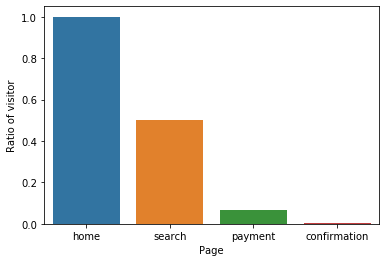

In [125]:
#draw bar plot
fig, ax = plt.subplots()
sns.barplot(x='page',y='ratio of visitor',data=ratio_of_visitor)
ax.set_xlabel('Page')
ax.set_ylabel('Ratio of visitor')
plt.show()

After the users enter the website, 50% of them perform a search, 6.7% of them click on a item, finally only 0.5% of users really purchase a item.

2) Calculate converision rate for each page type

In [122]:
#for example: conversion rate of current page = number of users land on next page / total number of users land on current page
def conversion_rate(df):
    rates = []
    rates.append(df['page_search'].sum() / df['page_home'].sum())
    rates.append(df['page_payment'].sum() / df['page_search'].sum())
    rates.append(df['page_confirmation'].sum() / df['page_payment'].sum())
    return rates

rates = conversion_rate(data)
conv_rate = pd.DataFrame({'page':['home','search','payment'], 'conversion rate':rates})
print(conv_rate)

      page  conversion rate
0     home         0.500000
1   search         0.133407
2  payment         0.074959


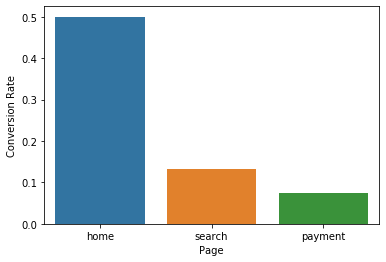

In [123]:
#draw bar plot
fig, ax = plt.subplots()
sns.barplot(x='page',y='conversion rate',data=conv_rate)
ax.set_xlabel('Page')
ax.set_ylabel('Conversion Rate')
plt.show()

3) Calculate conversion rate by device

In [119]:
#check the category of device
print(data['device'].unique())

['Desktop' 'Mobile']


In [126]:
rates_desktop = conversion_rate(data[data['device']=='Desktop'])
rates_mobile = conversion_rate(data[data['device']=='Mobile'])

[0.5, 0.1, 0.04983388704318937, 0.5, 0.2, 0.1]

In [127]:
conv_rate_by_device = pd.DataFrame({'page':['home','search','payment','home','search','payment'],
                                    'device':['Desktop','Desktop','Desktop','Mobile','Mobile','Mobile'],
                                    'conversion rate':rates_desktop + rates_mobile})
print(conv_rate_by_device)

      page   device  conversion rate
0     home  Desktop         0.500000
1   search  Desktop         0.100000
2  payment  Desktop         0.049834
3     home   Mobile         0.500000
4   search   Mobile         0.200000
5  payment   Mobile         0.100000


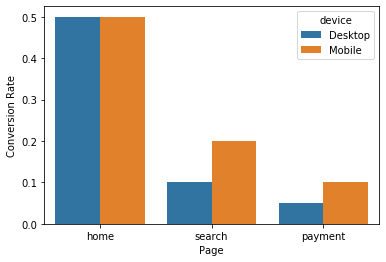

In [133]:
#draw bar plot
fig,ax=plt.subplots()
sns.barplot(x='page',y='conversion rate',data=conv_rate_by_device, hue='device')
ax.set_xlabel('Page')
ax.set_ylabel('Conversion Rate')
plt.show()

4) Calculate conversion rate by sex

In [134]:
#check the category of device
print(data['sex'].unique())

['Female' 'Male']


In [135]:
rates_female = conversion_rate(data[data['sex']=='Female'])
rates_male = conversion_rate(data[data['sex']=='Male'])

In [138]:
conv_rate_by_sex = pd.DataFrame({'page':['home','search','payment','home','search','payment'],
                                    'sex':['Female','Female','Female','Male','Male','Male'],
                                    'conversion rate':rates_female + rates_male})
print(conv_rate_by_sex)

      page     sex  conversion rate
0     home  Female         0.503073
1   search  Female         0.136708
2  payment  Female         0.077742
3     home    Male         0.496944
4   search    Male         0.130083
5  payment    Male         0.072014


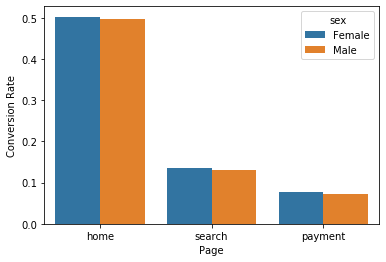

In [139]:
#draw bar plot
fig,ax=plt.subplots()
sns.barplot(x='page',y='conversion rate',data=conv_rate_by_sex, hue='sex')
ax.set_xlabel('Page')
ax.set_ylabel('Conversion Rate')
plt.show()

## Question 2
Reference: https://github.com/anupriyakush/E-commerce-Conversion-Funnel-Analysis/blob/master/Recommendation%20Report.pdf